In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log, exp

In [85]:
def normal_sample(N, k=1, random_state=None):
    np.random.seed(random_state)
    return np.random.normal(0, 1, size=(k, N))

def brownian_motion(T, N, k=1, random_state=None):
    dW = normal_sample(N, k) * sqrt (T / N)
    return np.insert(dW.cumsum(axis=1), 0, 0, 1)

def GBM(T, N, mu, sigma, S_0, k=1, random_state=None):
    time = np.linspace(0, T, N+1)
    W = brownian_motion(T, N, k)
    S = S_0 * np.exp((mu - (sigma ** 2) / 2) * time + sigma * W)
    return (S)

def UO (T, N, alpha, gamma, sigma, S_0, k=1, random_state=None):
    time = np.linspace(0, T, N+1)
    dW = normal_sample(N, k) * sqrt (T / N)
    integral = np.insert(np.cumsum(np.exp(alpha * time[1:]) * dW, axis=1), 0, 0, 1)
    S = S_0 * np.exp(-alpha * time) + gamma * (1 - np.exp(-alpha * time)) + \
    sigma * np.exp(-alpha * time) * integral
    return S

In [86]:
brownian_motion(1,100,1)

array([[ 0.        , -0.26548272, -0.14229972, -0.18112858, -0.12418947,
        -0.1734941 , -0.16568055, -0.20517502, -0.32527372, -0.36632558,
        -0.34140949, -0.44090545, -0.31789845, -0.24330601, -0.05532487,
        -0.10525336,  0.03077884,  0.14603922,  0.24641699,  0.14185105,
         0.15334363,  0.20435846,  0.19919673,  0.22841933,  0.12328667,
         0.11100132,  0.14800626,  0.30788159,  0.3839437 ,  0.33369859,
         0.29320629,  0.25563657,  0.34777842,  0.15756191,  0.17259727,
         0.11174002,  0.08129827, -0.02699903, -0.07051568, -0.1800852 ,
         0.00122267,  0.04107653,  0.02858438, -0.03629905,  0.06889263,
         0.0105265 ,  0.01525421, -0.14175218, -0.02841284, -0.05510978,
        -0.109816  , -0.10890945, -0.2237378 , -0.29198855, -0.27885767,
        -0.25806982, -0.20291018, -0.2460192 , -0.19979921, -0.22137955,
        -0.17394626, -0.208357  , -0.17498362, -0.27618041, -0.36680213,
        -0.3479816 , -0.47404246, -0.74259374, -0.6

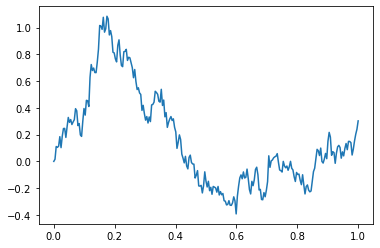

In [87]:
plt.plot(np.linspace(0,1,253), brownian_motion(1, 252).T)

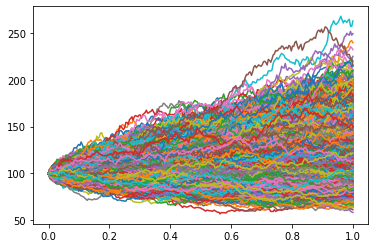

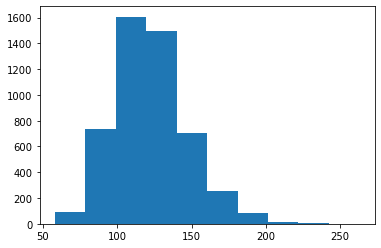

In [115]:
simulations = GBM(1, 252, 0.2, 0.2, 100, 5000).T
plt.plot(np.linspace(0,1,253), simulations)
plt.show()
plt.hist(simulations[-1])
plt.show()

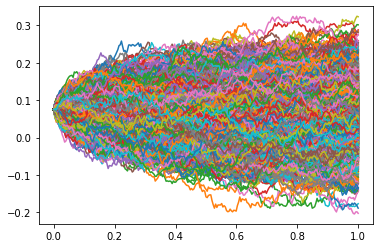

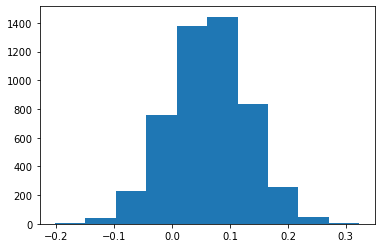

In [116]:
simulations = UO(1, 252, 1, 0.055, 0.1, 0.075, 5000).T
plt.plot(np.linspace(0,1,253),  simulations)
plt.show()
plt.hist(simulations[-1])
plt.show()